# House Price Prediction - Improved
This notebook improves upon the baseline Linear Regression model by introducing:
1. **Exploratory Data Analysis (EDA):** Correlation matrix and distribution plots.
2. **Feature Engineering:** Creating new meaningful features.
3. **Feature Scaling:** Normalizing features for better model performance.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

print("Libraries imported.")

Libraries imported.


## 1. Load Data

In [2]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

print(f"Dataset loaded with {df.shape[0]} samples and {df.shape[1]} columns.")
df.head()

Dataset loaded with 20640 samples and 9 columns.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 2. Exploratory Data Analysis (EDA)

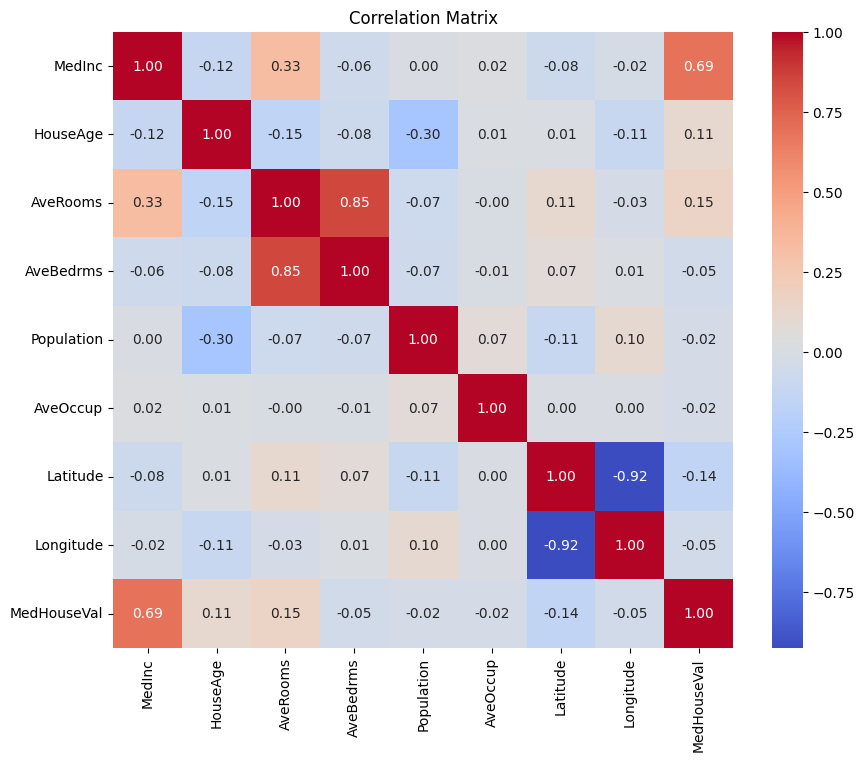

In [3]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

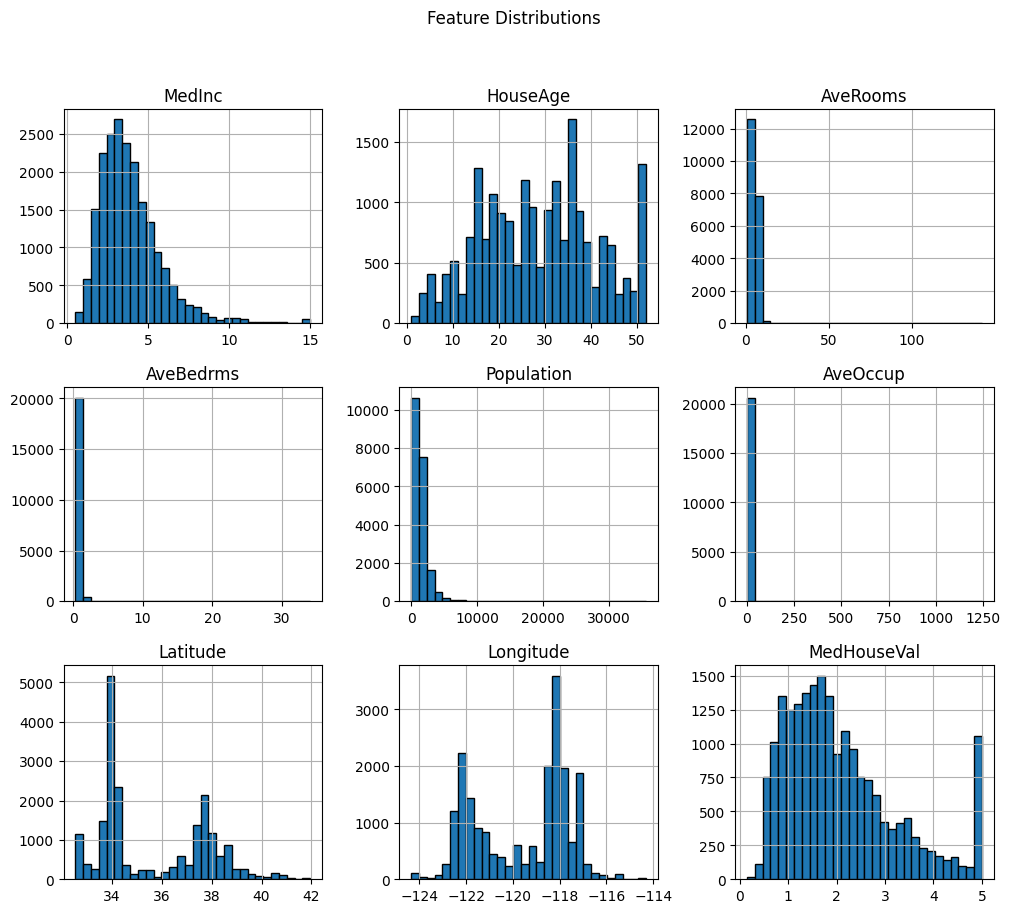

In [4]:
# Feature Distributions
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()

## 3. Feature Engineering
Creating new features that might help the model:
- `Bedrooms_per_Room`: Ratio of bedrooms to total rooms.
- `Population_per_Household`: Average population per household.
- `Rooms_per_Household`: Average rooms per household (already exists as AveRooms, but good to verify or create variations).

In [5]:
# Create new features
df['Bedrooms_per_Room'] = df['AveBedrms'] / df['AveRooms']
df['Population_per_Household'] = df['Population'] / df['AveOccup']

# Separate Features (X) and Target (y)
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

print("New features created.")
X.head()

New features created.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Bedrooms_per_Room,Population_per_Household
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,0.146591,126.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,0.155797,1138.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0.129516,177.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0.184458,219.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0.172096,259.0


## 4. Feature Scaling
Standardizing features so they have mean=0 and variance=1. This is important for Linear Regression.

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Convert back to DataFrame for readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Features scaled.")
X_scaled.head()

Features scaled.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Bedrooms_per_Room,Population_per_Household
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,-1.145833,-0.977033
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,-0.987175,1.669961
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,-1.440115,-0.843637
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,-0.493194,-0.733781
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,-0.706259,-0.629157


## 5. Split Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)

print(f"X_train.shape : {X_train.shape}")
print(f"X_test.shape : {X_test.shape}")

X_train.shape : (16512, 10)
X_test.shape : (4128, 10)


## 6. Train Linear Regression Model

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


## 7. Evaluate Model

In [9]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Evaluation Results (Improved Model) ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared Score (R2): {r2:.4f}")


--- Evaluation Results (Improved Model) ---
Mean Squared Error (MSE): 0.4842
R-squared Score (R2): 0.6305


## 8. Visualize Results

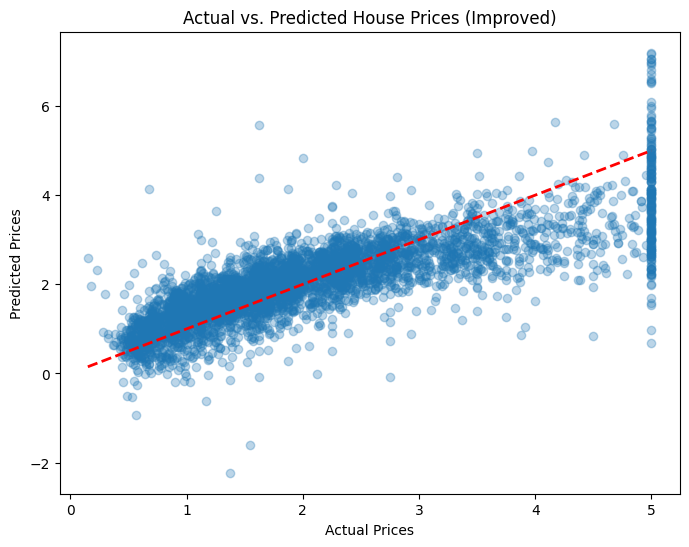

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices (Improved)")
plt.show()